In [92]:
import numpy as np
from tqdm.notebook import tqdm
%config InlineBackend.figure_format = 'svg'
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amsmath}', r'\usepackage{amsfonts}']}
plt.rcParams.update(params)

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


Text(0, 0.5, 'IDF1 ($\\uparrow$)')

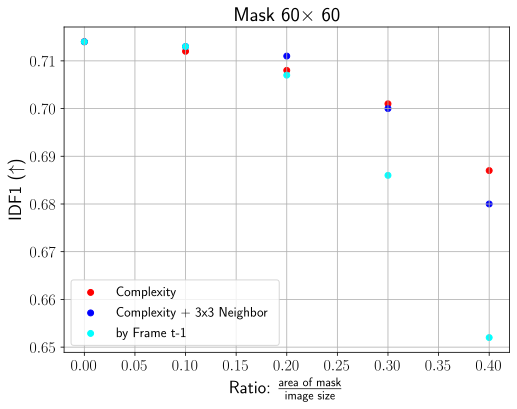

In [99]:
IDF1 = [0.714, 0.712, 0.708, 0.701, 0.687]
IDF1_neighbor = [0.714, 0.713, 0.711, 0.7, 0.68]
IDF1_framet_1 = [0.714, 0.713, 0.707, 0.686, 0.652]

ratios = [0, 0.1, 0.2, 0.3, 0.4]
fig, ax = plt.subplots(figsize=(8, 6))

plt.scatter(ratios, IDF1, label="Complexity", c='red')
plt.scatter(ratios, IDF1_neighbor, label="Complexity + 3x3 Neighbor", c='blue')
plt.scatter(ratios, IDF1_framet_1, label="by Frame t-1", c='cyan')

plt.title(r"Mask 60$\times$ 60", fontsize=20)

plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14, loc=3)

plt.xlabel(r"Ratio: $\frac{\text{area of mask}}{\text{image size}}$", fontsize=18)
plt.ylabel(r"IDF1 ($\uparrow$)", fontsize=18)

Text(0, 0.5, 'IDF1 ($\\uparrow$)')

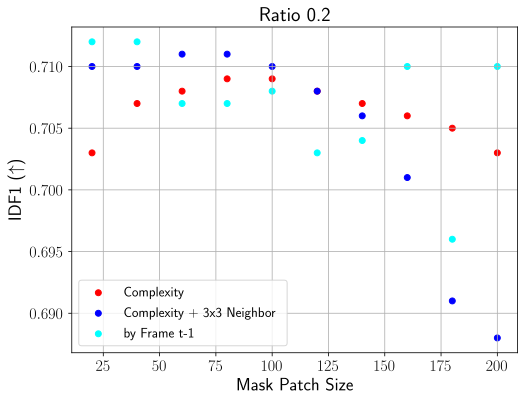

In [97]:
IDF1 = [0.703, 0.707, 0.708, 0.709, 0.709, 0.708, 0.707, 0.706, 0.705, 0.703]
IDF1_neighbor = [0.71, 0.71, 0.711, 0.711, 0.71, 0.708, 0.706, 0.701, 0.691, 0.688]
IDF1_framet_1 = [0.712, 0.712, 0.707, 0.707, 0.708, 0.703, 0.704, 0.71, 0.696, 0.71]

patch = list(range(20, 220, 20))
fig, ax = plt.subplots(figsize=(8, 6))

plt.scatter(patch, IDF1, label="Complexity", c='red')
plt.scatter(patch, IDF1_neighbor, label="Complexity + 3x3 Neighbor", c='blue')
plt.scatter(patch, IDF1_framet_1, label="by Frame t-1", c='cyan')

plt.title(r"Ratio 0.2", fontsize=20)

plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)

plt.xlabel(r"Mask Patch Size", fontsize=18)
plt.ylabel(r"IDF1 ($\uparrow$)", fontsize=18)

In [2]:
import torch
torch.cuda.set_device(3)

In [3]:
import sys
from pathlib import Path
lib_dir = (Path(".").parent / '..').resolve()
sys.path.insert(0, str(lib_dir))

In [4]:
from mmcv import Config
from mmdet.datasets import build_dataset
# from mmdet.datasets import build_dataloader
from qdtrack.datasets import build_dataloader
import ml_collections

In [9]:
cfg = Config.fromfile("./configs/bdd100k/qdtrack-frcnn_r50_fpn_12e_bdd100k.py")
cfg.data.test.test_mode = True

In [10]:
dataset = build_dataset(cfg.data.test)

loading annotations into memory...
Done (t=2.38s)
creating index...
index created!


In [11]:
# data_loader = build_dataloader(dataset, samples_per_gpu=1, workers_per_gpu=cfg.data.workers_per_gpu, dist=False, shuffle=False)

In [ ]:
data = dataset[0]

[09/20 14:05:12] matplotlib.image WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


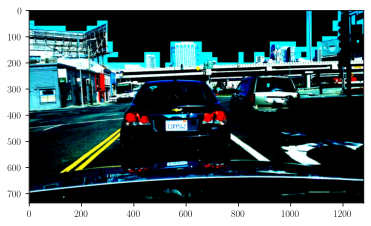

In [13]:
plt.imshow(np.transpose(data["img"][0], axes=(1, 2, 0)))

In [48]:
data["img"][0].shape

torch.Size([3, 736, 1280])

In [86]:
THRESHOLD = 0.01
def draw_bbox(image, bbox):
    fig, ax = plt.subplots()
    ax.imshow(image)
    for l1 in range(len(bbox)):
        for l2 in range(len(bbox[l1])):
            if bbox[l1][l2][-1] <= THRESHOLD: continue
            x1, y1, x2, y2 = bbox[l1][l2][:-1]
            rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    plt.show()

In [87]:
from PIL import Image

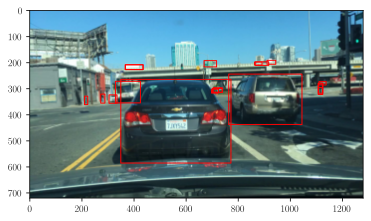

In [88]:
image = Image.open("/ssd1/chenwy/dataset/bdd100k/images/track/val/b20e291a-32ac11c1/b20e291a-32ac11c1-0000001.jpg")

bbox = np.load("bbox.npy", allow_pickle=True)
draw_bbox(image, bbox)

In [62]:
masked = np.load("masked.npy").transpose(1, 2, 0)
image = np.load("image.npy").transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


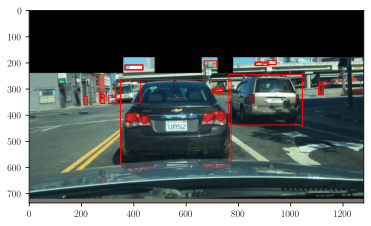

In [89]:
draw_bbox(np.load("masked.npy").transpose(1, 2, 0) / 255., bbox)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


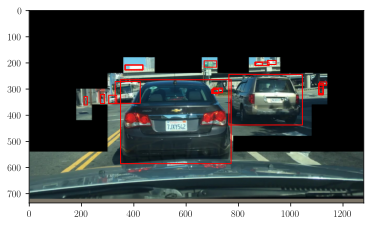

In [90]:
# plt.imshow(image/255., vmin=0)
draw_bbox(np.load("masked.npy").transpose(1, 2, 0) / 255., bbox)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


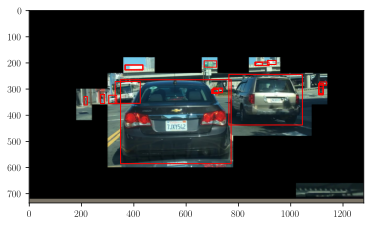

In [91]:
draw_bbox(np.load("masked.npy").transpose(1, 2, 0) / 255., bbox)